In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [152]:
exps  = ['exp1','exp2','exp3','exp4']
funcs = ['sphere','rastrigin','rosenbrock']

In [153]:
def plot_one(exp, func, ax):
    measure = 'fitness'
    nn_path = Path(f'../../data/cluster_results/{exp}/{func}')
    nn_path = list(nn_path.glob('freq1*nn_p3*nn_s3*'))[0]
    nonn_path = Path(f'../../data/cluster_results/{exp}/{func}')
    nonn_path = list(nonn_path.glob('freq1*nn_p3*nn_s2*'))[0]
    files = [o for o in nn_path.glob(f'*{measure}*') if 'NNdrop' not in o.name] +\
            [o for o in nonn_path.glob(f'*{measure}*') if 'noNN' in o.name] +\
            [Path(f'../../data/results/{exp}/{func}/best_known.csv')]

    def read_values(x): return np.asarray(pd.read_csv(x)).mean(0)
    mean_values = [read_values(f) for f in files[:-1]]
    mean_values.append(np.asarray(pd.read_csv(files[-1]).fitness))

    for f,v in zip(files,mean_values):
        ax.plot(v, label=f.stem, linewidth=3, alpha=0.5)

    return ax

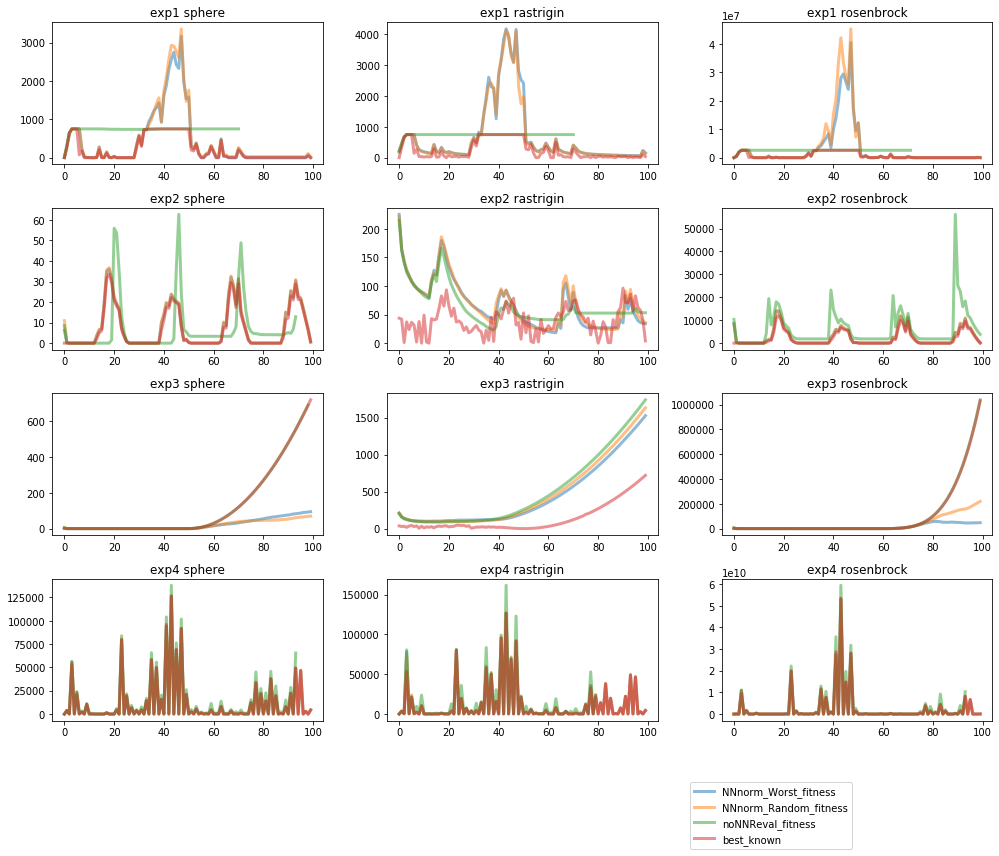

In [154]:
fig,axs = plt.subplots(4, 3, figsize=(14,12))

for ax_row,exp in zip(axs,exps):
    for ax,func in zip(ax_row,funcs):
        plot_one(exp,func,ax)
        ax.set_title(f'{exp} {func}')
        
ax.legend(loc='best', bbox_to_anchor=(0, -0.90, 0.5, 0.5))
plt.tight_layout()

In [155]:
axs[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12c945be0>,
      dtype=object)

# ----

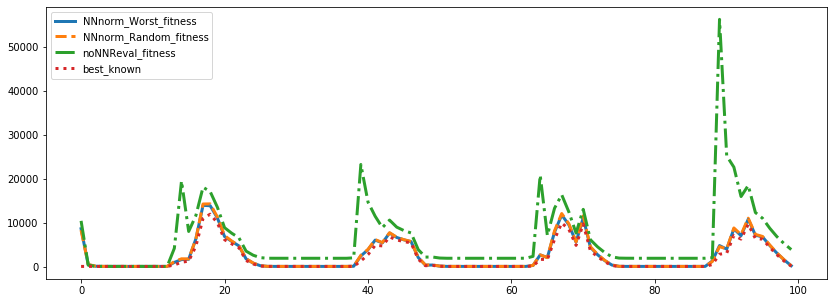

In [121]:
fig,ax = plt.subplots(figsize=(14,5))

for f,v,ls in zip(files,mean_values,['-','--','-.',':']):
    ax.plot(v, label=f.stem, linewidth=3, linestyle=ls)
    
ax.legend()

In [99]:
files

[PosixPath('../../data/cluster_results/exp2/rosenbrock/freq1nn_w5nn_p3nn_s3nn_tw5nn_bs4nn_epoch3/NNnorm_Worst_fitness.csv'),
 PosixPath('../../data/cluster_results/exp2/rosenbrock/freq1nn_w5nn_p3nn_s3nn_tw5nn_bs4nn_epoch3/NNnorm_Random_fitness.csv'),
 PosixPath('../../data/cluster_results/exp2/rosenbrock/freq1nn_w5nn_p3nn_s2nn_tw5nn_bs4nn_epoch3/noNNReval_fitness.csv'),
 PosixPath('../../data/results/exp2/rosenbrock/best_known.csv')]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


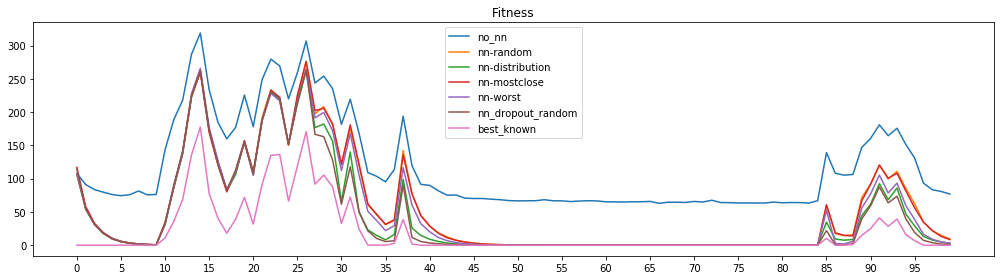

In [3]:
# fitness plots
# no_nn = pd.read_csv(path/'no_nn_fitness.csv').mean(0)
# nn_random = pd.read_csv(path/'nn-random_fitness.csv').mean(0)
# nn_distribution = pd.read_csv(path/'nn-distribution_fitness.csv').mean(0)
# nn_mostclose = pd.read_csv(path/'nn-mostclose_fitness.csv').mean(0)
# nn_worst = pd.read_csv(path/'nn-worst_fitness.csv').mean(0)
best_known = pd.read_csv(path/'best_known.csv').fitness
# nn_dropout_random = pd.read_csv(path/'nn-dropout-random_fitness.csv').mean(0)
fig,ax = plt.subplots(figsize=(14,4))
for values,t in zip([no_nn,nn_random, nn_distribution, nn_mostclose,nn_worst , nn_dropout_random, best_known],['no_nn','nn-random', 'nn-distribution', 'nn-mostclose','nn-worst','nn_dropout_random','best_known']): ax.plot(values, label=t)

ax.set_title('Fitness')
locs,labels = plt.xticks(np.arange(0,99,step=5))
ax.legend()
plt.tight_layout()
plt.savefig(path/'fitness_value.eps', format='eps', dpi=1000)

In [4]:
# constraints plots
nn = pd.read_csv(path/'nn_sumcv.csv').mean(0)
no_nn = pd.read_csv(path/'no_nn_sumcv.csv').mean(0)
nn_random = pd.read_csv(path/'nn-random_sumcv.csv').mean(0)
nn_distribution = pd.read_csv(path/'nn-distribution_sumcv.csv').mean(0)
nn_mostclose = pd.read_csv(path/'nn-mostclose_sumcv.csv').mean(0)
nn_worst = pd.read_csv(path/'nn-worst_sumcv.csv').mean(0)
best_known = pd.read_csv(path/'best_known.csv').sum_constraints
fig,ax = plt.subplots(figsize=(14,4))
for values,t in zip([no_nn,nn_random, nn_distribution, nn_mostclose,nn_worst , best_known],['no_nn','nn-random', 'nn-distribution', 'nn-mostclose','nn-worst','best_known']): ax.plot(values, label=t)

ax.set_title('Sum constraints')
locs,labels = plt.xticks(np.arange(0,99,step=5))
ax.legend()
plt.tight_layout()
plt.savefig(path/'constraints_values.eps', format='eps', dpi=1000)

FileNotFoundError: [Errno 2] File b'../../data/results/experiment1/nn_sumcv.csv' does not exist: b'../../data/results/experiment1/nn_sumcv.csv'